In [51]:
import missingno as msno
import pickle

pd.set_option('display.max_columns', None)

In [2]:
with open('datas/transfermarkt.pkl', 'rb') as f:
    transfer_df = pickle.load(f)

In [3]:
print(transfer_df.shape)
transfer_df

(2657, 19)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup
0,Ederson,£50.40m,36,28,19,3,-,-,27,"1,88",Goalkeeper,left,Manchester City,"Jul 1, 2017","Jun 30, 2025","May 13, 2018",Puma,3,11
1,Zack Steffen,£5.40m,1,1,-,-,-,-,26,"1,91",Goalkeeper,right,Manchester City,"Jul 9, 2019","Jun 30, 2023","May 13, 2018",Nike,2,4
2,Scott Carson,£450Th.,1,3,-,-,-,-,35,"1,88",Goalkeeper,right,Manchester City,"Aug 8, 2019","May 31, 2021","Aug 19, 2020",Nike,2,5
3,Rúben Dias,£63.00m,32,1,-,4,-,-,24,"1,87",Defender-Centre-Back,right,Manchester City,"Sep 29, 2020","Jun 30, 2026","Aug 19, 2020",Nike,2,5
4,Aymeric Laporte,£45.00m,16,-,-,1,-,-,26,"1,89",Defender-Centre-Back,left,Manchester City,"Jan 30, 2018","Jun 30, 2025","Feb 22, 2019",adidas,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,Moussa Koné,£2.70m,33,9,-,2,-,-,24,"1,75",attack-Centre-Forward,right,Nîmes Olympique,"Jan 22, 2020","Jun 30, 2023","Jun 30, 2020",Puma,1,3
550,Nolan Roux,£1.08m,19,-,-,2,-,-,33,"1,82",attack-Centre-Forward,right,Nîmes Olympique,"Jan 30, 2020","Jun 30, 2021","Jun 25, 2020",Puma,1,0
551,Karim Aribi,£900Th.,13,-,-,-,-,-,26,"1,92",attack-Centre-Forward,right,Nîmes Olympique,"Oct 2, 2020","Jun 30, 2024","Jun 25, 2020",Puma,1,1
552,Clément Depres,£720Th.,1,-,-,-,-,-,26,"1,88",attack-Centre-Forward,right,Nîmes Olympique,"Jul 1, 2015","Jun 30, 2022","Apr 21, 2016",Puma,1,0


- market_value
    - £ 제거 및 단위환산
- height
    - , 제거
- conceded_goals ~ red_card : `-` > `0` 으로 replace

In [4]:
transfer_df['market_value'] = transfer_df['market_value'].apply(
    lambda x: 
    x.replace("m", "0000").replace(".", "").replace("£", "")
    if x.replace("£", "")[-1] == "m" 
    else x.replace("Th.", "000").replace(".", "").replace("£", "")
)

transfer_df['height'] = transfer_df['height'].apply(lambda x: x.replace(",", ""))
transfer_df.loc[:, "conceded_goals":"red_card"].replace("-", "0", inplace=True)

- expire, last_contract, expire 결측치 파악 후 None값으로 replace
- datetime 데이터타입으로 변환을 위한 포맷변경 및 데이터타입 변환

In [5]:
transfer_df[transfer_df['joined'] == "-"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup
392,Leif Davis,450000,2,0,0,0,0,0,21,177,Defender-Left-Back,left,Leeds United,-,"Jun 30, 2023","Nov 11, 2019",Nike,1,0


In [6]:
transfer_df[transfer_df['last_contract'] == "-"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup


In [7]:
transfer_df[transfer_df['expire'] == "-"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup
31,Rhys Williams,4500000,9,0,0,0,0,0,20,195,Defender-Centre-Back,right,Liverpool FC,"Jul 1, 2020",-,"Sep 1, 2020",Puma,1,0
126,Joe Scally,1800000,15,1,0,2,0,0,18,184,Defender-Right-Back,right,Borussia Mönchengladbach,"Jan 1, 2021",-,"Feb 23, 2019",adidas,2,0
133,Kaan Kurt,225000,31,0,2,4,0,0,19,174,midfield-RightMidfield,both,Borussia Mönchengladbach,"Aug 7, 2020",-,"Nov 19, 2019",adidas,1,0
135,Torben Müsel,270000,-,0,0,0,0,0,21,185,midfield-AttackingMidfield,right,Borussia Mönchengladbach,"Jul 1, 2018",-,"Nov 19, 2019",adidas,1,0
136,Famana Quizera,180000,24,4,3,4,0,0,19,172,midfield-AttackingMidfield,right,Borussia Mönchengladbach,"Aug 7, 2020",-,"Nov 19, 2019",adidas,1,0
208,Felix Irorere,180000,None,None,None,None,None,None,18,195,Defender-Centre-Back,both,Eintracht Frankfurt,"Jul 1, 2020",-,"Feb 18, 2021",Puma,1,0
230,Alexander Schwolow,5400000,25,37,8,0,0,0,28,190,Goalkeeper,right,Hertha BSC,"Aug 4, 2020",-,"Sep 16, 2020",adidas,1,3
241,Deyovaisio Zeefuik,3600000,22,1,0,2,1,0,23,177,Defender-Right-Back,right,Hertha BSC,"Aug 6, 2020",-,"Sep 29, 2017",Nike,1,3
248,Eduard Löwen,3600000,6,0,0,0,0,0,24,188,midfield-CentralMidfield,right,Hertha BSC,"Jul 1, 2019",-,"Sep 29, 2020",adidas,2,0
260,Ruwen Werthmüller,135000,11,3,1,1,0,0,20,183,attack-Centre-Forward,right,Hertha BSC,"Feb 8, 2021",-,"Feb 8, 2021",Nike,1,0


In [8]:
transfer_df.loc[transfer_df['joined'] == "-", 'joined'] = None
transfer_df.loc[transfer_df['expire'] == "-", 'expire'] = None

In [9]:
mon_datas = {"Jan": "1", "Feb": "2", "Mar": "3", "Apr": "4", "May": "5", "Jun": "6",
            "Jul": "7", "Aug": "8", "Sep": "9", "Oct": "10", "Nov": "11", "Dec": "12"}

def converter_date(date):
    try:
        mon, year = date.split(",")
        year = year.strip()
        mon, day = mon.split(" ")
        for key, value in mon_datas.items():
            mon = mon.replace(key, str(value))
        result = year + "-" + mon + "-" + day
    except:
        result = date
            
    return result

In [10]:
transfer_df['joined'] = transfer_df['joined'].apply(converter_date)
transfer_df['last_contract'] = transfer_df['last_contract'].apply(converter_date)
transfer_df['expire'] = transfer_df['expire'].apply(converter_date)

In [11]:
transfer_df['joined'] = pd.to_datetime(transfer_df['joined'], format='%Y-%m-%d', errors='raise')
transfer_df['expire'] = pd.to_datetime(transfer_df['expire'], format='%Y-%m-%d', errors='raise')
transfer_df['last_contract'] = pd.to_datetime(transfer_df['last_contract'], format='%Y-%m-%d', errors='raise')

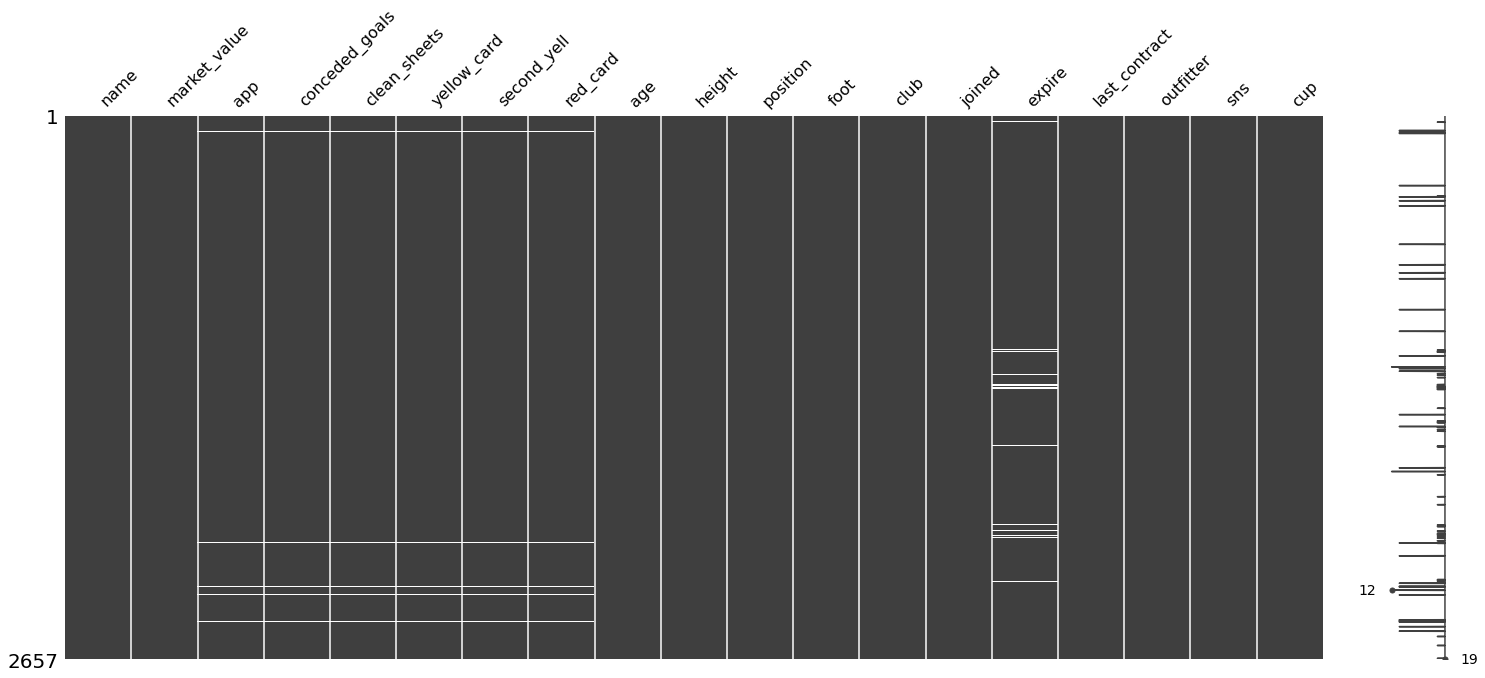

In [12]:
msno.matrix(transfer_df);

- `app` ~ `red_card` 의 결측치 처리
    - None에 대해 경기를 뛰지 않았다고 판단하에 0으로 replace

In [16]:
print(len(transfer_df[transfer_df['app'].isna()]))
transfer_df[transfer_df['app'].isna()].tail(3)

0


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup


In [17]:
transfer_df.loc[:, "app":"red_card"] = transfer_df.loc[:, "app":"red_card"].fillna("0")

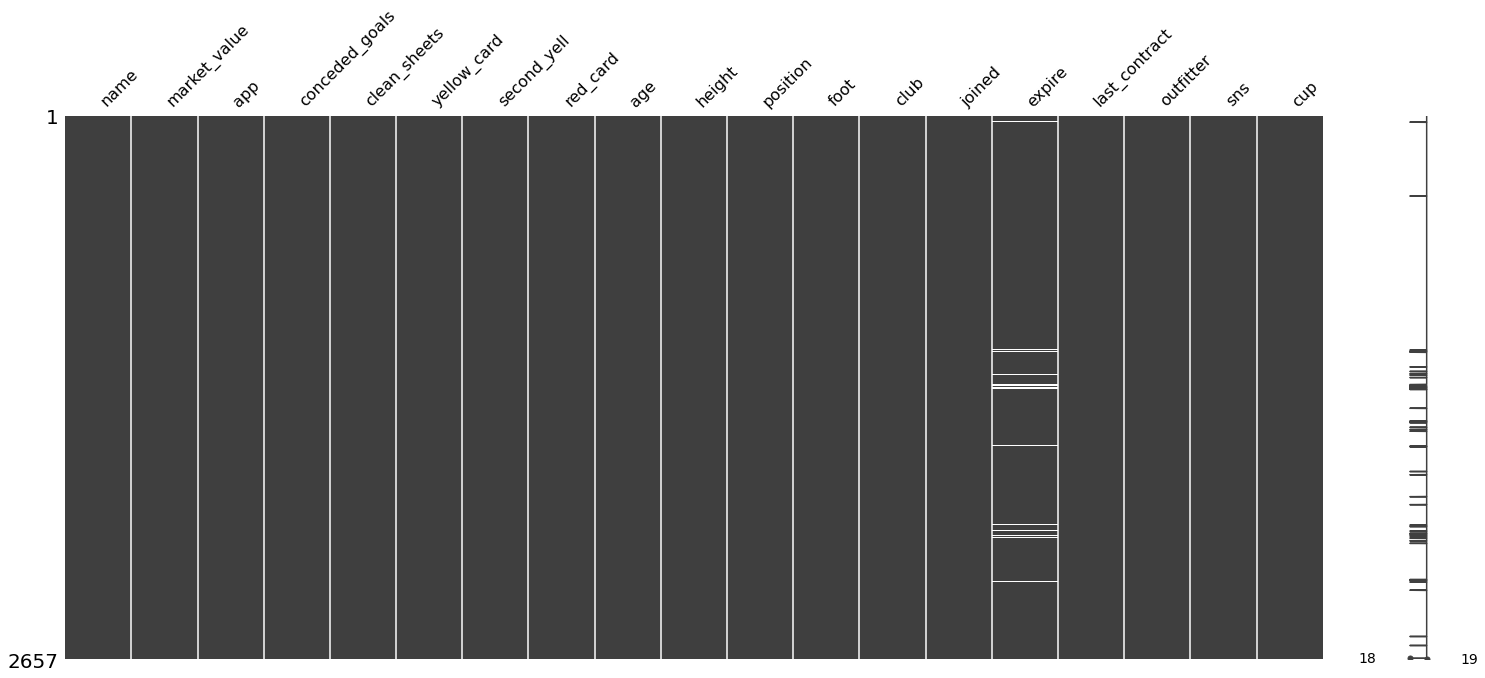

In [18]:
msno.matrix(transfer_df);

# 보류 : merge 한 뒤 전처리

- 경기를 아예 뛰지 않은 players의 경기스탯을 -1로 replace

In [13]:
# total_df.loc[total_df['app'] == "0", "conceded_goals":"red_card"] = -1

In [14]:
# total_df[total_df['app'] == "0"].tail()

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup
362,David Kong,90000,0,-1,-1,-1,-1,-1,26,183,midfield-DefensiveMidfield,right,FC Girondins Bordeaux B,"Jan 31, 2019","Jun 30, 2021","Dec 6, 2019",Nike,1,1
367,Ibrahim Diarra,270000,0,-1,-1,-1,-1,-1,23,175,midfield-LeftMidfield,left,FC Girondins Bordeaux B,"Jul 1, 2017","Jun 30, 2021","Mar 25, 2021",Nike,1,0
370,Logan Delaurier-Chaubet,180000,0,-1,-1,-1,-1,-1,19,173,attack-LeftWinger,left,FC Girondins Bordeaux B,"Jul 1, 2019","Jun 30, 2023","Jun 4, 2020",adidas,1,0
393,Idrissa Dioh,135000,0,-1,-1,-1,-1,-1,22,187,midfield-DefensiveMidfield,right,Stade Brest 29,"Jul 1, 2020","Jun 30, 2021","May 31, 2020",Nike,1,0
415,Manuel Cabit,585000,0,-1,-1,-1,-1,-1,27,180,Defender-Left-Back,left,FC Metz,"Jul 1, 2019","Jun 30, 2022","Aug 30, 2018",adidas,1,0


- `joined`, `expire` 결측치 전처리

In [19]:
transfer_df.isna().sum()

name               0
market_value       0
app                0
conceded_goals     0
clean_sheets       0
yellow_card        0
second_yell        0
red_card           0
age                0
height             0
position           0
foot               0
club               0
joined             1
expire            55
last_contract      0
outfitter          0
sns                0
cup                0
dtype: int64

In [20]:
transfer_df

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup
0,Ederson,50400000,36,28,19,3,0,0,27,188,Goalkeeper,left,Manchester City,2017-07-01,2025-06-30,2018-05-13,Puma,3,11
1,Zack Steffen,5400000,1,1,0,0,0,0,26,191,Goalkeeper,right,Manchester City,2019-07-09,2023-06-30,2018-05-13,Nike,2,4
2,Scott Carson,450000,1,3,0,0,0,0,35,188,Goalkeeper,right,Manchester City,2019-08-08,2021-05-31,2020-08-19,Nike,2,5
3,Rúben Dias,63000000,32,1,0,4,0,0,24,187,Defender-Centre-Back,right,Manchester City,2020-09-29,2026-06-30,2020-08-19,Nike,2,5
4,Aymeric Laporte,45000000,16,0,0,1,0,0,26,189,Defender-Centre-Back,left,Manchester City,2018-01-30,2025-06-30,2019-02-22,adidas,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,Moussa Koné,2700000,33,9,0,2,0,0,24,175,attack-Centre-Forward,right,Nîmes Olympique,2020-01-22,2023-06-30,2020-06-30,Puma,1,3
550,Nolan Roux,1080000,19,0,0,2,0,0,33,182,attack-Centre-Forward,right,Nîmes Olympique,2020-01-30,2021-06-30,2020-06-25,Puma,1,0
551,Karim Aribi,900000,13,0,0,0,0,0,26,192,attack-Centre-Forward,right,Nîmes Olympique,2020-10-02,2024-06-30,2020-06-25,Puma,1,1
552,Clément Depres,720000,1,0,0,0,0,0,26,188,attack-Centre-Forward,right,Nîmes Olympique,2015-07-01,2022-06-30,2016-04-21,Puma,1,0


In [21]:
transfer_df['name_age'] = transfer_df['name'] + transfer_df['age']

In [22]:
with open('datas/all_league.pkl', 'rb') as f:
    whoscore_df = pickle.load(f)

In [23]:
whoscore_df

,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,...,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age
0,0.5,0.2,0.6,0.0,0.0,0.3,0.0,0.0,8.52,30.0,...,9.0,2.2,64.2,85.1,1.0,2.0,0.2,0.2,22.0,Lionel Messi 33
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.24,0.0,...,0.0,0.0,31.0,45.2,0.0,9.0,0.0,1.0,0.0,Ángel Jiménez 18
2,0.7,0.5,1.3,0.0,0.8,0.8,0.1,0.0,7.62,23.0,...,7.0,1.3,32.0,69.7,0.4,1.8,0.2,1.9,12.0,Gerard Moreno 29
3,0.2,0.2,0.5,0.0,0.7,0.3,0.1,0.0,7.57,23.0,...,9.0,1.1,35.6,84.6,0.1,1.3,0.1,0.8,8.0,Karim Benzema 33
4,1.3,0.4,0.9,0.0,0.0,1.1,0.0,0.0,7.38,4.0,...,0.0,1.3,28.1,83.8,0.3,0.0,0.1,0.3,2.0,Ansu Fati 18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.81,0.0,...,0.0,0.0,3.0,100.0,0.0,0.0,0.0,0.0,0.0,Habib Keita 19
2820,1.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.75,0.0,...,0.0,0.0,6.3,57.9,0.3,0.0,0.0,0.7,0.0,Anastasios Donis 24
2821,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,5.72,0.0,...,0.0,0.0,45.0,68.9,0.0,3.0,0.0,3.0,0.0,Aleksandar Radovanovic 27
2822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.55,0.0,...,0.0,0.0,21.0,81.0,0.0,3.0,0.0,1.0,0.0,Marcin Bulka 21


In [24]:
datasets = [transfer_df, whoscore_df]
for dataset in datasets:
    dataset['name_age'] = dataset['name_age'].apply(lambda x: x.strip())
    dataset['name_age'] = dataset['name_age'].apply(lambda x: x.replace(" ", "").replace("-", ""))
    dataset['sort_name'] = dataset['name_age'].apply(lambda x: "".join(sorted(x.lower())))

In [25]:
transfer_df.tail(2)

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,...,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age,sort_name
552,Clément Depres,720000,1,0,0,0,0,0,26,188,...,right,Nîmes Olympique,2015-07-01,2022-06-30,2016-04-21,Puma,1,0,ClémentDepres26,26cdeeelmnprsté
553,Sami Ben Amar,315000,1,0,0,0,0,0,23,185,...,right,Nîmes Olympique,2018-07-01,2021-06-30,2016-04-21,Puma,1,0,SamiBenAmar23,23aaabeimmnrs


In [26]:
whoscore_df.tail(2)

,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,...,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age,sort_name
2822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.55,0.0,...,0.0,21.0,81.0,0.0,3.0,0.0,1.0,0.0,MarcinBulka21,12aabciklmnru
2823,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.01,0.0,...,0.0,28.0,50.0,0.0,5.0,0.0,0.0,0.0,StefanBajic19,19aabcefijnst


In [28]:
total_df = pd.merge(transfer_df, whoscore_df, on='sort_name')

In [37]:
print(total_df.shape)

(2278, 49)


In [53]:
total_df['sort_name'].value_counts()

24aabdefiiloop        3
23acceiknoprrttu      3
19aaainnorrtuyï       2
29aabnorrsu           2
02aabcehosy           2
                     ..
25aabdeejknnr         1
27aagilnsstvó         1
28aacdiimorru         1
23aaadegillnnorrvw    1
25abeeggnrrsy         1
Name: sort_name, Length: 2180, dtype: int64

In [49]:
total_df['sort_name'].value_counts()[total_df['sort_name'].value_counts() >= 2].index

Index(['24aabdefiiloop', '23acceiknoprrttu', '19aaainnorrtuyï', '29aabnorrsu',
       '02aabcehosy', '02aaalmnnooooprtv', '25aaabceilorrrstu',
       '23aaaaddglmnnooorrr', '13aabdeinrsstuy', '33adeehmnnoostty',
       '12accdhhiirrrss', '03aaccehimmoostu', '25abceiknprrrtu',
       '19eeggiinoorrrttu', '27abeklorrssy', '24aachiiilnorstv',
       '22aaabdhiiillmor', '24aadimnnrráí', '25aaaabiinnnoorst',
       '02aaeefflnoswy', '27dhiikkmnoor', '28accciiiiinnoprst', '23acijklouv',
       '12aacccehiilmnsuë', '23aaddeeeeffijlnréï', '27akkloosuuyy',
       '27adekknnoor', '28aaafglooprò', '22aahjjmos', '29aiijllnoswé',
       '23aillloopr', '33aaaadggijlnnnor', '29aadfhikmnorsstu',
       '24aacdeehijmnnors', '28bbinnoorrsué', '36adeeefllnnnoorrt',
       '28aaaegiklnnsv', '24abcdgiioorñó', '19aabefkkostuu', '28aaaadmmooorsu',
       '29aaaaccdinooprrrs', '02acehmnnsuzá', '13aeikmnnoorsttv',
       '24aaadegimrry', '26aagmnnnoorss', '27aaacddnnosty',
       '25aaacdeijjmnnnor', '23aaadee

In [52]:
total_df[total_df['sort_name'].isin(total_df['sort_name'].value_counts()[total_df['sort_name'].value_counts() >= 2].index)]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y
27,Ozan Kabak,22500000,9,0,0,3,0,0,21,186,Defender-Centre-Back,right,Liverpool FC,2021-02-01,2021-06-30,2018-12-10,Nike,2,1,OzanKabak21,12aaabkknoz,2.1,1.3,1.3,0.9,3.0,0.3,0.2,0.0,6.72,0.0,0.0,0.1,0.1,0.3,0.0,0.3,0.4,0.3,0.0,0.1,64.9,88.7,0.0,1.7,0.0,2.9,0.0,OzanKabak21
28,Ozan Kabak,22500000,9,0,0,3,0,0,21,186,Defender-Centre-Back,right,Liverpool FC,2021-02-01,2021-06-30,2018-12-10,Nike,2,1,OzanKabak21,12aaabkknoz,1.2,0.9,1.5,0.6,3.9,0.5,0.8,0.0,6.39,0.0,0.0,0.9,0.3,0.5,0.1,0.6,0.6,1.3,0.0,0.3,49.0,87.9,0.0,2.3,0.1,4.1,0.0,OzanKabak21
123,Thomas Partey,40500000,24,0,2,5,0,0,27,185,midfield-DefensiveMidfield,right,Arsenal FC,2020-10-05,2025-06-30,2016-11-21,Nike,3,3,ThomasPartey27,27aaehmoprstty,2.3,0.7,1.7,0.0,0.3,1.0,0.3,0.0,7.09,0.0,0.0,1.7,0.0,0.3,0.0,0.3,0.0,2.3,0.0,0.0,73.3,89.1,0.3,6.7,0.0,0.7,1.0,ThomasPartey27
124,Thomas Partey,40500000,24,0,2,5,0,0,27,185,midfield-DefensiveMidfield,right,Arsenal FC,2020-10-05,2025-06-30,2016-11-21,Nike,3,3,ThomasPartey27,27aaehmoprstty,1.8,1.0,0.8,0.0,0.6,1.3,0.2,0.0,6.75,0.0,2.0,1.1,0.5,0.7,0.0,0.4,0.9,1.2,2.0,0.5,47.5,87.2,0.0,2.7,0.1,1.0,1.0,ThomasPartey27
128,Martin Ødegaard,36000000,14,1,2,0,0,0,22,178,midfield-AttackingMidfield,left,Arsenal FC,2021-01-27,2021-06-30,2020-09-04,Nike,3,4,MartinØdegaard22,22aaaddegimnrrtø,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,6.21,0.0,0.0,0.4,0.7,0.1,0.0,0.1,0.7,0.1,0.0,0.7,23.1,88.9,0.1,1.1,0.1,0.0,0.0,MartinØdegaard22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,Sacha Boey,2250000,26,0,1,1,0,1,20,178,Defender-Right-Back,right,Dijon FCO,2020-10-05,2021-06-30,2020-01-14,adidas,1,1,SachaBoey20,02aabcehosy,1.5,1.0,1.0,0.0,1.0,0.5,0.0,0.0,6.07,0.0,0.0,0.5,0.5,0.0,0.0,0.0,1.5,0.0,0.0,0.5,34.0,85.3,0.5,1.0,0.0,1.0,0.0,SachaBoey20
2251,Aboubakar Kamara,1800000,10,1,0,1,0,1,26,177,attack-Centre-Forward,right,Dijon FCO,2021-02-01,2021-06-30,2019-09-02,adidas,1,0,AboubakarKamara26,26aaaaaabbkkmorru,0.2,0.1,0.8,0.0,0.0,0.5,0.0,0.0,5.95,0.0,0.0,0.4,0.5,0.3,0.0,0.7,1.2,0.4,0.0,0.5,10.2,75.9,0.1,0.4,0.0,1.0,0.0,AboubakarKamara26
2252,Aboubakar Kamara,1800000,10,1,0,1,0,1,26,177,attack-Centre-Forward,right,Dijon FCO,2021-02-01,2021-06-30,2019-09-02,adidas,1,0,AboubakarKamara26,26aaaaaabbkkmorru,0.3,0.0,1.4,0.0,0.2,0.6,0.0,0.0,6.31,1.0,0.0,1.1,0.7,1.7,0.1,1.6,1.8,0.8,0.0,0.7,13.3,73.7,0.5,0.4,0.0,1.5,1.0,AboubakarKamara26
2261,Patrick Burner,2250000,23,0,0,0,0,0,25,170,Defender-Right-Back,right,Nîmes Olympique,2020-09-25,2024-06-30,2019-05-29,Uhlsport,1,0,PatrickBurner25,25abceiknprrrtu,1.1,1.1,0.7,0.2,1.6,0.6,0.1,0.0,6.29,0.0,0.0,0.3,0.5,0.5,0.0,0.1,0.7,0.5,0.0,0.5,22.9,75.8,0.2,0.7,0.0,0.6,0.0,PatrickBurner25


In [55]:
total_df = total_df.drop_duplicates(['name'], keep = 'first',ignore_index = True)

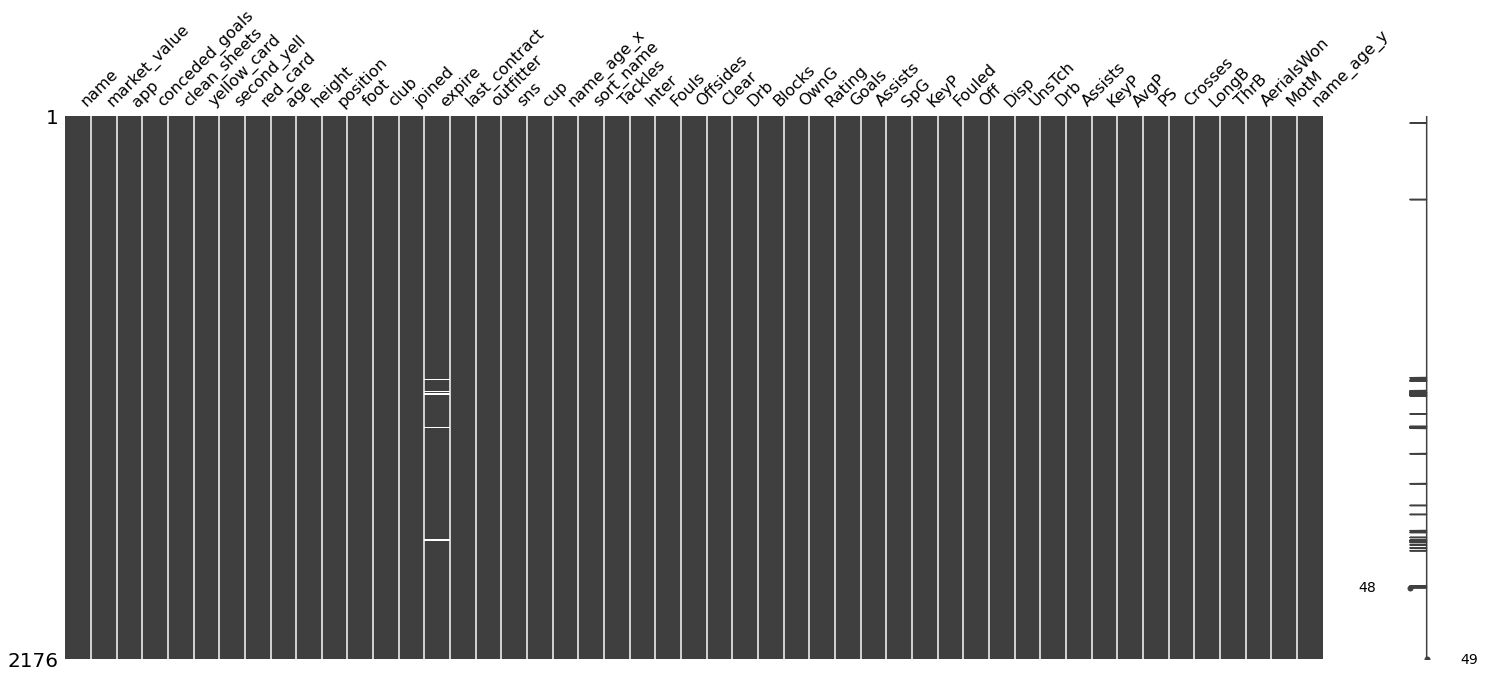

In [57]:
msno.matrix(total_df);

In [58]:
total_df['expire'].value_counts()

2023-06-30    500
2021-06-30    492
2022-06-30    485
2024-06-30    445
2025-06-30    186
2026-06-30     19
2021-05-31     11
2027-06-30      2
2021-06-20      1
2028-06-30      1
Name: expire, dtype: int64

In [59]:
total_df['expire'].median()

Timestamp('2023-06-30 00:00:00')

In [62]:
total_df[total_df['expire'].isna()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,Assists,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y
29,Rhys Williams,4500000,9,0,0,0,0,0,20,195,Defender-Centre-Back,right,Liverpool FC,2020-07-01,NaT,2020-09-01,Puma,1,0,RhysWilliams20,02ahiillmrsswy,0.7,0.7,0.4,0.4,2.9,0.0,0.3,0.0,6.71,0.0,0.0,0.8,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.2,56.0,87.3,0.0,2.1,0.1,3.3,0.0,RhysWilliams20
1048,Alexander Schwolow,5400000,25,37,8,0,0,0,28,190,Goalkeeper,right,Hertha BSC,2020-08-04,NaT,2020-09-16,adidas,1,3,AlexanderSchwolow28,28aacdeehllnoorswwx,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,6.60,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,30.3,77.3,0.0,6.8,0.0,0.2,2.0,AlexanderSchwolow28
1058,Deyovaisio Zeefuik,3600000,22,1,0,2,1,0,23,177,Defender-Right-Back,right,Hertha BSC,2020-08-06,NaT,2017-09-29,Nike,1,3,DeyovaisioZeefuik23,23adeeefiiikoosuvyz,0.6,0.5,0.9,0.2,1.2,0.5,0.1,0.0,6.42,1.0,0.0,0.1,0.5,0.8,0.0,0.2,0.7,0.4,0.0,0.5,16.9,71.5,0.5,0.7,0.0,1.6,0.0,DeyovaisioZeefuik23
1061,Eduard Löwen,3600000,6,0,0,0,0,0,24,188,midfield-CentralMidfield,right,Hertha BSC,2019-07-01,NaT,2020-09-29,adidas,2,0,EduardLöwen24,24addeelnruwö,0.7,0.1,0.1,0.0,0.1,0.4,0.0,0.0,6.08,0.0,0.0,0.1,0.0,0.0,0.0,0.4,0.3,0.0,0.0,0.0,8.6,80.0,0.1,0.4,0.0,0.0,0.0,EduardLöwen24
1100,Mark Flekken,1800000,2,3,0,0,0,0,27,194,Goalkeeper,both,SC Freiburg,2018-07-01,NaT,2020-08-09,Puma,1,1,MarkFlekken27,27aeefkkklmnr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.7,72.6,0.0,11.3,0.0,0.0,0.0,MarkFlekken27
1101,Philipp Lienhart,12600000,33,4,0,4,0,0,24,189,Defender-Centre-Back,right,SC Freiburg,2018-07-01,NaT,2021-05-12,Nike,1,3,PhilippLienhart24,24aehhiiillnppprt,0.6,1.2,0.5,0.4,2.7,0.3,0.6,0.0,6.58,4.0,0.0,0.3,0.1,1.0,0.1,0.1,0.3,0.1,0.0,0.1,57.0,85.0,0.0,4.2,0.0,1.7,0.0,PhilippLienhart24
1105,Christian Günter,8100000,33,3,3,2,0,0,28,185,Defender-Left-Back,left,SC Freiburg,2012-07-01,NaT,2021-03-18,Nike,1,3,ChristianGünter28,28aceghiinnrrsttü,1.0,0.9,0.9,0.1,0.9,0.8,0.3,0.0,6.73,3.0,3.0,0.8,2.0,0.5,0.1,0.4,1.1,0.5,3.0,2.0,33.0,75.5,1.9,1.8,0.0,0.4,3.0,ChristianGünter28
1106,Jonathan Schmid,3150000,30,2,2,4,0,0,30,180,Defender-Right-Back,right,SC Freiburg,2019-07-01,NaT,2021-03-18,Nike,1,1,JonathanSchmid30,03aacdhhijmnnost,1.2,0.9,0.5,0.0,1.0,0.5,0.3,0.0,6.65,2.0,2.0,0.7,0.8,0.5,0.0,0.4,0.9,0.6,2.0,0.8,30.5,77.1,0.6,2.1,0.0,0.5,0.0,JonathanSchmid30
1108,Nicolas Höfler,2700000,30,1,3,11,0,0,31,181,midfield-DefensiveMidfield,right,SC Freiburg,2010-07-01,NaT,2020-01-28,Nike,1,3,NicolasHöfler31,13acefhillnorsö,1.7,2.1,2.3,0.0,1.1,1.2,0.3,0.0,6.91,1.0,3.0,0.6,0.5,1.1,0.0,0.5,0.9,1.1,3.0,0.5,44.5,84.5,0.1,2.3,0.0,2.0,1.0,NicolasHöfler31
1111,Lino Tempelmann,810000,10,0,0,2,0,0,22,174,midfield-CentralMidfield,right,SC Freiburg,2019-09-13,NaT,2019-10-31,Puma,1,1,LinoTempelmann22,22aeeillmmnnnopt,0.5,0.2,0.4,0.0,0.6,0.4,0.1,0.0,6.12,0.0,0.0,0.4,0.1,0.7,0.0,0.3,0.0,0.1,0.0,0.1,14.0,80.7,0.0,0.8,0.0,0.6,0.0,LinoTempelmann22


In [63]:
total_df.isna().sum()

name               0
market_value       0
app                0
conceded_goals     0
clean_sheets       0
yellow_card        0
second_yell        0
red_card           0
age                0
height             0
position           0
foot               0
club               0
joined             1
expire            34
last_contract      0
outfitter          0
sns                0
cup                0
name_age_x         0
sort_name          0
Tackles            0
Inter              0
Fouls              0
Offsides           0
Clear              0
Drb                0
Blocks             0
OwnG               0
Rating             0
Goals              0
Assists            0
SpG                0
KeyP               0
Fouled             0
Off                0
Disp               0
UnsTch             0
Drb                0
Assists            0
KeyP               0
AvgP               0
PS                 0
Crosses            0
LongB              0
ThrB               0
AerialsWon         0
MotM         

<AxesSubplot:xlabel='expire', ylabel='Density'>

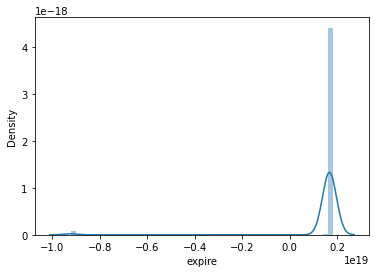

In [64]:
sns.distplot(total_df['expire'])

In [65]:
total_df['expire'].value_counts()

2023-06-30    500
2021-06-30    492
2022-06-30    485
2024-06-30    445
2025-06-30    186
2026-06-30     19
2021-05-31     11
2027-06-30      2
2021-06-20      1
2028-06-30      1
Name: expire, dtype: int64

In [68]:
pd.DataFrame(total_df['Assists'])

,Assists,Assists
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2171,0.0,0.0
2172,0.0,0.0
2173,0.0,0.0
2174,0.0,0.0


In [71]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2176 non-null   object        
 1   market_value    2176 non-null   object        
 2   app             2176 non-null   object        
 3   conceded_goals  2176 non-null   object        
 4   clean_sheets    2176 non-null   object        
 5   yellow_card     2176 non-null   object        
 6   second_yell     2176 non-null   object        
 7   red_card        2176 non-null   object        
 8   age             2176 non-null   object        
 9   height          2176 non-null   object        
 10  position        2176 non-null   object        
 11  foot            2176 non-null   object        
 12  club            2176 non-null   object        
 13  joined          2175 non-null   datetime64[ns]
 14  expire          2142 non-null   datetime64[ns]
 15  last

In [ ]:
total_df.reset_

In [75]:
list(total_df.columns[:39])

['name',
 'market_value',
 'app',
 'conceded_goals',
 'clean_sheets',
 'yellow_card',
 'second_yell',
 'red_card',
 'age',
 'height',
 'position',
 'foot',
 'club',
 'joined',
 'expire',
 'last_contract',
 'outfitter',
 'sns',
 'cup',
 'name_age_x',
 'sort_name',
 'Tackles',
 'Inter',
 'Fouls',
 'Offsides',
 'Clear',
 'Drb',
 'Blocks',
 'OwnG',
 'Rating',
 'Goals',
 'Assists',
 'SpG',
 'KeyP',
 'Fouled',
 'Off',
 'Disp',
 'UnsTch',
 'Drb']

In [80]:
total_df.columns = ['name', 'market_value', 'app', 'conceded_goals', 'clean_sheets',
       'yellow_card', 'second_yell', 'red_card', 'age', 'height', 'position',
       'foot', 'club', 'joined', 'expire', 'last_contract', 'outfitter', 'sns',
       'cup', 'name_age_x', 'sort_name', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Rating', 'Goals',
       'Assists', 'SpG', 'KeyP', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Drb',
       'Assists_2', 'KeyP', 'AvgP', 'PS', 'Crosses', 'LongB', 'ThrB',
       'AerialsWon', 'MotM', 'name_age_y']

In [81]:
total_df.drop(columns='Assists_2', inplace=True)

In [82]:
total_df

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y
0,Ederson,50400000,36,28,19,3,0,0,27,188,Goalkeeper,left,Manchester City,2017-07-01,2025-06-30,2018-05-13,Puma,3,11,Ederson27,27deenors,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,6.61,0.0,1.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,26.6,81.2,0.0,4.4,0.0,0.2,0.0,Ederson27
1,Zack Steffen,5400000,1,1,0,0,0,0,26,191,Goalkeeper,right,Manchester City,2019-07-09,2023-06-30,2018-05-13,Nike,2,4,ZackSteffen26,26aceeffknstz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,80.8,0.0,1.0,0.0,0.0,0.0,ZackSteffen26
2,Scott Carson,450000,1,3,0,0,0,0,35,188,Goalkeeper,right,Manchester City,2019-08-08,2021-05-31,2020-08-19,Nike,2,5,ScottCarson35,35accnoorsstt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,90.0,0.0,0.0,0.0,0.0,0.0,ScottCarson35
3,Rúben Dias,63000000,32,1,0,4,0,0,24,187,Defender-Centre-Back,right,Manchester City,2020-09-29,2026-06-30,2020-08-19,Nike,2,5,RúbenDias24,24abdeinrsú,0.8,1.1,0.7,0.3,2.8,0.4,0.7,1.0,6.91,1.0,0.0,0.4,0.1,0.6,0.0,0.1,0.3,0.2,0.1,84.8,93.2,0.0,3.4,0.0,1.9,0.0,RúbenDias24
4,Aymeric Laporte,45000000,16,0,0,1,0,0,26,189,Defender-Centre-Back,left,Manchester City,2018-01-30,2025-06-30,2019-02-22,adidas,3,11,AymericLaporte26,26aaceeilmoprrty,0.8,0.7,0.6,0.6,1.8,0.3,0.4,0.0,6.76,0.0,0.0,0.4,0.3,0.6,0.1,0.1,0.5,0.1,0.3,79.6,91.1,0.0,2.9,0.0,2.6,0.0,AymericLaporte26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,Yassine Benrahou,2700000,23,0,0,2,0,0,22,170,midfield-AttackingMidfield,right,Nîmes Olympique,2020-07-01,2023-06-30,2020-06-30,Nike,1,0,YassineBenrahou22,22aabeehinnorssuy,0.7,0.2,0.3,0.0,0.2,0.8,0.0,0.0,6.34,0.0,0.0,0.8,1.1,1.1,0.0,1.3,2.0,0.7,1.1,22.0,82.6,0.9,1.4,0.1,0.3,0.0,YassineBenrahou22
2172,Moussa Koné,2700000,33,9,0,2,0,0,24,175,attack-Centre-Forward,right,Nîmes Olympique,2020-01-22,2023-06-30,2020-06-30,Puma,1,3,MoussaKoné24,24akmnoossué,0.4,0.1,0.6,0.0,0.2,0.2,0.0,0.0,6.45,9.0,0.0,0.9,0.3,1.2,0.5,0.9,2.0,0.8,0.3,8.8,77.5,0.0,0.3,0.0,0.5,0.0,MoussaKoné24
2173,Nolan Roux,1080000,19,0,0,2,0,0,33,182,attack-Centre-Forward,right,Nîmes Olympique,2020-01-30,2021-06-30,2020-06-25,Puma,1,0,NolanRoux33,33alnnoorux,0.4,0.3,0.6,0.0,0.2,0.3,0.0,0.0,6.05,0.0,0.0,0.5,0.2,0.8,0.2,0.5,1.4,0.1,0.2,7.4,74.3,0.1,0.1,0.0,0.7,0.0,NolanRoux33
2174,Karim Aribi,900000,13,0,0,0,0,0,26,192,attack-Centre-Forward,right,Nîmes Olympique,2020-10-02,2024-06-30,2020-06-25,Puma,1,1,KarimAribi26,26aabiiikmrr,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.0,0.0,0.6,0.2,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,KarimAribi26


<AxesSubplot:>

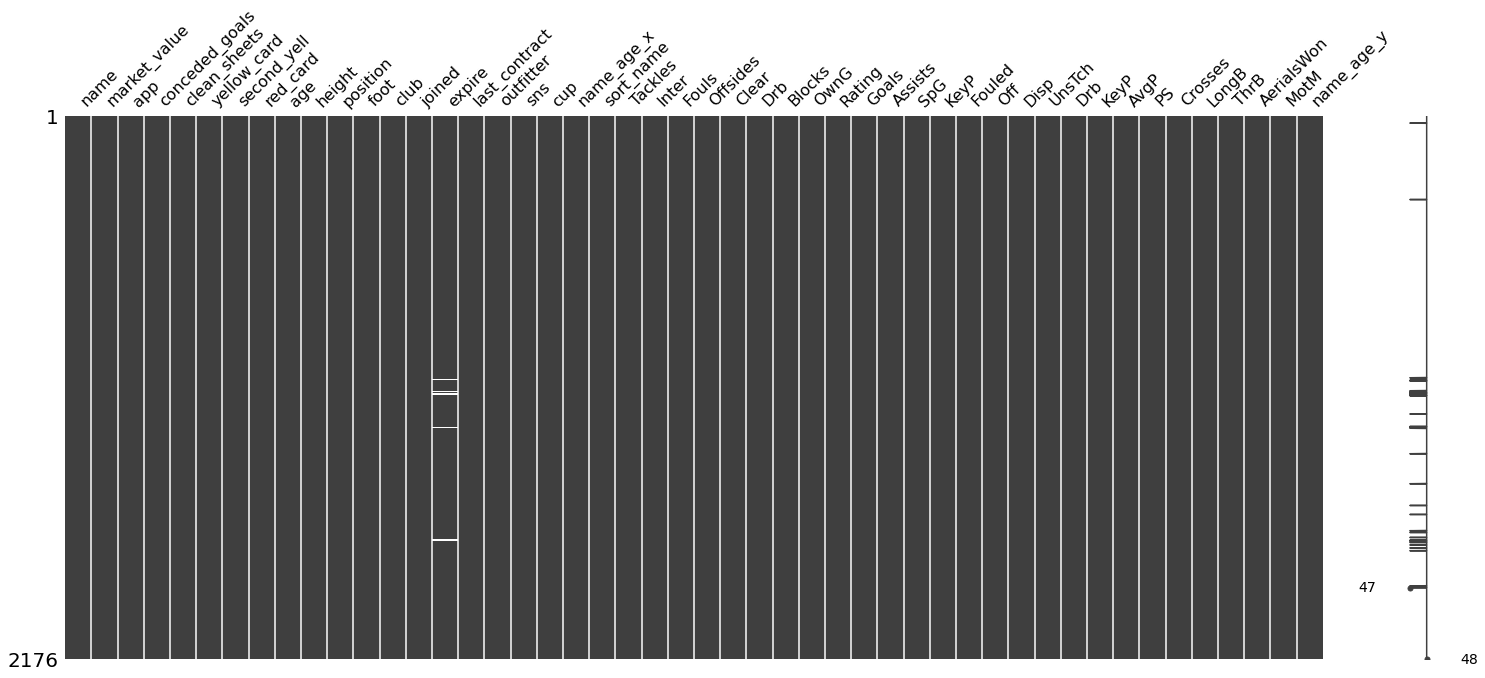

In [84]:
msno.matrix(total_df)

In [ ]:
total_df['period'] = total_df['expire'] - total_df['last_contract']
total_df['period'] = np.round(total_df['period'].apply(lambda x: x.days) / 365, 1)

In [91]:
total_df['period'] = total_df['expire'] - total_df['last_contract']

In [92]:
total_df['period'] = np.round(total_df['period'].apply(lambda x: x.days) / 365, 1)

In [ ]:
total_df.loc[total_df['app'] == "0", "conceded_goals":"red_card"] = -1

In [96]:
total_df.columns

Index(['name', 'market_value', 'app', 'conceded_goals', 'clean_sheets',
       'yellow_card', 'second_yell', 'red_card', 'age', 'height', 'position',
       'foot', 'club', 'joined', 'expire', 'last_contract', 'outfitter', 'sns',
       'cup', 'name_age_x', 'sort_name', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Rating', 'Goals',
       'Assists', 'SpG', 'KeyP', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Drb',
       'KeyP', 'AvgP', 'PS', 'Crosses', 'LongB', 'ThrB', 'AerialsWon', 'MotM',
       'name_age_y', 'period'],
      dtype='object')

In [97]:
total_df.loc[total_df['app'] == "0"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period


In [ ]:
["conceded_goals"]

In [101]:
total_df[total_df['app'] == "-"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period
650,David Juncà,630000,-,0,0,1,0,0,27,178,Defender-Left-Back,left,Celta de Vigo,2018-07-01,2023-06-30,2020-07-23,Nike,1,0,DavidJuncà27,27acddijnuvà,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DavidJuncà27,2.9
915,Josep Martínez,2250000,-,0,0,0,0,0,22,191,Goalkeeper,right,RB Leipzig,2020-07-15,2024-06-30,2021-05-07,adidas,1,0,JosepMartínez22,22aeejmnoprstzí,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,73.9,0.0,5.0,0.0,1.0,0.0,JosepMartínez22,3.2
956,Paulinho,11700000,-,0,0,0,0,0,20,177,attack-LeftWinger,right,Bayer 04 Leverkusen,2018-07-15,2023-06-30,2020-12-17,Nike,3,1,Paulinho20,02ahilnopu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,29.0,82.8,0.0,0.0,0.0,0.0,0.0,Paulinho20,2.5
962,Emrehan Gedikli,675000,-,0,0,0,0,0,18,186,attack-Centre-Forward,right,Bayer 04 Leverkusen,2020-07-01,2022-06-30,2020-08-13,Puma,1,0,EmrehanGedikli18,18adeeeghiiklmnr,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,75.0,0.0,0.0,0.0,0.0,0.0,EmrehanGedikli18,1.9
1012,Tim Siersleben,180000,-,0,0,0,0,0,21,187,Defender-Centre-Back,left,VfL Wolfsburg,2021-01-01,2024-06-30,2020-12-08,Nike,4,0,TimSiersleben21,12beeeiilmnrsst,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.38,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,83.3,0.0,2.0,0.0,1.0,0.0,TimSiersleben21,3.6
1029,Elias Bördner,90000,-,0,0,0,0,0,19,188,Goalkeeper,right,Eintracht Frankfurt,2021-02-18,2023-06-30,2021-02-18,adidas,1,0,EliasBördner19,19abdeeilnrrsö,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,7.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,58.8,0.0,4.0,0.0,0.0,0.0,EliasBördner19,2.4
1337,Nikita Contini,450000,-,0,0,1,0,0,25,190,Goalkeeper,right,SSC Napoli,2015-07-01,2025-06-30,2020-09-23,adidas,2,1,NikitaContini25,25aciiiiknnnott,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NikitaContini25,4.8
1457,Stefano Turati,360000,-,0,0,1,0,0,19,188,Goalkeeper,right,US Sassuolo,2019-10-01,2025-06-30,2020-11-25,adidas,1,0,StefanoTurati19,19aaefinorstttu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,StefanoTurati19,4.6


In [99]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2176 non-null   object        
 1   market_value    2176 non-null   object        
 2   app             2176 non-null   object        
 3   conceded_goals  2176 non-null   object        
 4   clean_sheets    2176 non-null   object        
 5   yellow_card     2176 non-null   object        
 6   second_yell     2176 non-null   object        
 7   red_card        2176 non-null   object        
 8   age             2176 non-null   object        
 9   height          2176 non-null   object        
 10  position        2176 non-null   object        
 11  foot            2176 non-null   object        
 12  club            2176 non-null   object        
 13  joined          2175 non-null   datetime64[ns]
 14  expire          2142 non-null   datetime64[ns]
 15  last

In [100]:
total_df['app'].unique()

array(['36', '1', '32', '16', '10', '22', '6', '13', '20', '28', '24',
       '21', '25', '26', '31', '27', '29', '12', '33', '2', '3', '5', '7',
       '9', '17', '38', '30', '35', '19', '37', '14', '23', '34', '4',
       '15', '18', '8', '11', '-'], dtype=object)

<AxesSubplot:>

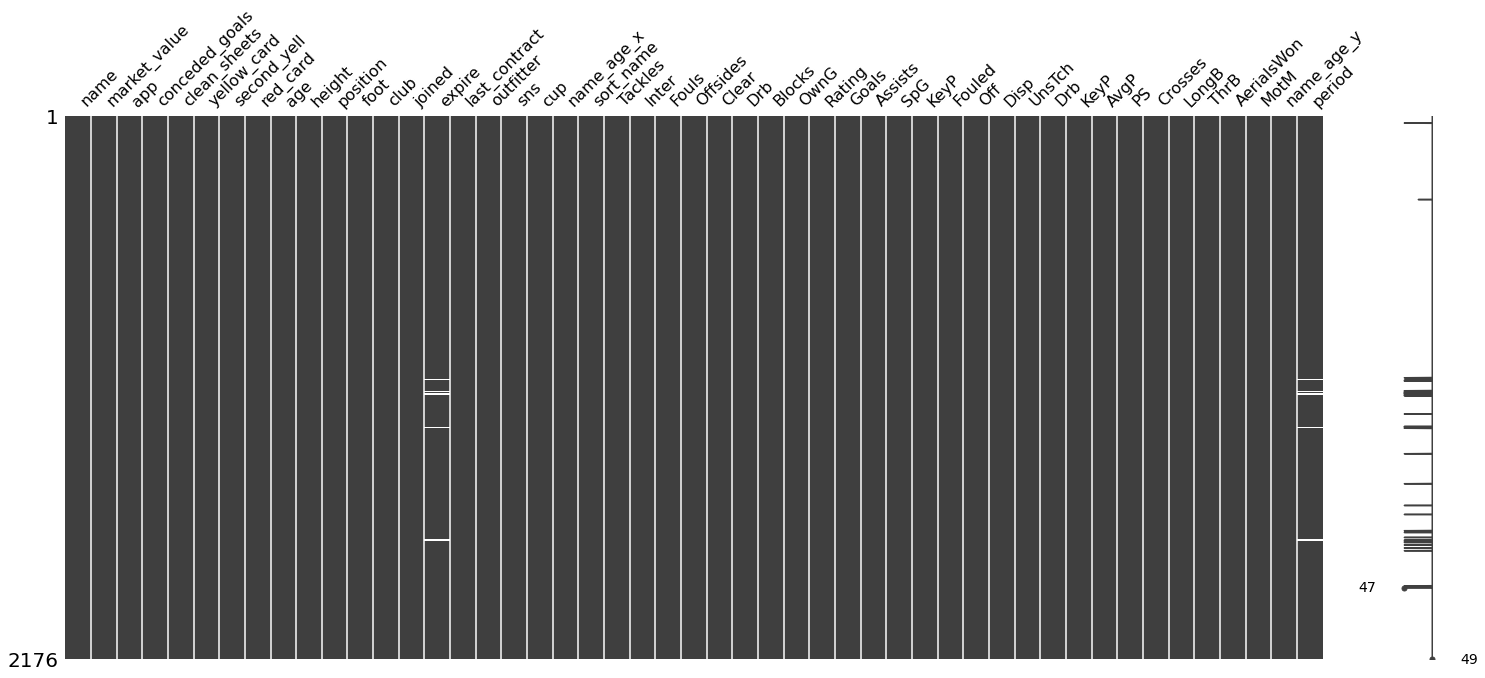

In [107]:
msno.matrix(total_df)

In [110]:
total_df.loc['app'][total_df['app'] == "-", :] = "0"

In [113]:
total_df.loc[total_df['app'] == "-"]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period


In [112]:
total_df.replace("-", "0", inplace=True)

In [114]:
total_df.columns


Index(['name', 'market_value', 'app', 'conceded_goals', 'clean_sheets',
       'yellow_card', 'second_yell', 'red_card', 'age', 'height', 'position',
       'foot', 'club', 'joined', 'expire', 'last_contract', 'outfitter', 'sns',
       'cup', 'name_age_x', 'sort_name', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Rating', 'Goals',
       'Assists', 'SpG', 'KeyP', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Drb',
       'KeyP', 'AvgP', 'PS', 'Crosses', 'LongB', 'ThrB', 'AerialsWon', 'MotM',
       'name_age_y', 'period'],
      dtype='object')

In [115]:
ls = ["conceded_goals", "clean_sheets", "yellow_card", "second_yell", "red_card", "Goals", "Assists"]
ls

['conceded_goals',
 'clean_sheets',
 'yellow_card',
 'second_yell',
 'red_card',
 'Goals',
 'Assists']

In [119]:
for col in ls:
    total_df[col] = total_df[col].astype('int') / total_df['app'].astype('int')

In [118]:
total_df['conceded_goals'].astype('int') / total_df['app'].astype('int')

0       0.777778
1       1.000000
2       3.000000
3       0.031250
4       0.000000
          ...   
2171    0.000000
2172    0.272727
2173    0.000000
2174    0.000000
2175    0.000000
Length: 2176, dtype: float64

In [120]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2176 non-null   object        
 1   market_value    2176 non-null   object        
 2   app             2176 non-null   object        
 3   conceded_goals  2168 non-null   float64       
 4   clean_sheets    2168 non-null   float64       
 5   yellow_card     2171 non-null   float64       
 6   second_yell     2168 non-null   float64       
 7   red_card        2168 non-null   float64       
 8   age             2176 non-null   object        
 9   height          2176 non-null   object        
 10  position        2176 non-null   object        
 11  foot            2176 non-null   object        
 12  club            2176 non-null   object        
 13  joined          2175 non-null   datetime64[ns]
 14  expire          2142 non-null   datetime64[ns]
 15  last

In [121]:
total_df

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period
0,Ederson,50400000,36,0.777778,0.527778,0.083333,0.0,0.0,27,188,Goalkeeper,left,Manchester City,2017-07-01,2025-06-30,2018-05-13,Puma,3,11,Ederson27,27deenors,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,6.61,0.000000,0.027778,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,26.6,81.2,0.0,4.4,0.0,0.2,0.0,Ederson27,7.1
1,Zack Steffen,5400000,1,1.000000,0.000000,0.000000,0.0,0.0,26,191,Goalkeeper,right,Manchester City,2019-07-09,2023-06-30,2018-05-13,Nike,2,4,ZackSteffen26,26aceeffknstz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,80.8,0.0,1.0,0.0,0.0,0.0,ZackSteffen26,5.1
2,Scott Carson,450000,1,3.000000,0.000000,0.000000,0.0,0.0,35,188,Goalkeeper,right,Manchester City,2019-08-08,2021-05-31,2020-08-19,Nike,2,5,ScottCarson35,35accnoorsstt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.94,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,90.0,0.0,0.0,0.0,0.0,0.0,ScottCarson35,0.8
3,Rúben Dias,63000000,32,0.031250,0.000000,0.125000,0.0,0.0,24,187,Defender-Centre-Back,right,Manchester City,2020-09-29,2026-06-30,2020-08-19,Nike,2,5,RúbenDias24,24abdeinrsú,0.8,1.1,0.7,0.3,2.8,0.4,0.7,1.0,6.91,0.031250,0.000000,0.4,0.1,0.6,0.0,0.1,0.3,0.2,0.1,84.8,93.2,0.0,3.4,0.0,1.9,0.0,RúbenDias24,5.9
4,Aymeric Laporte,45000000,16,0.000000,0.000000,0.062500,0.0,0.0,26,189,Defender-Centre-Back,left,Manchester City,2018-01-30,2025-06-30,2019-02-22,adidas,3,11,AymericLaporte26,26aaceeilmoprrty,0.8,0.7,0.6,0.6,1.8,0.3,0.4,0.0,6.76,0.000000,0.000000,0.4,0.3,0.6,0.1,0.1,0.5,0.1,0.3,79.6,91.1,0.0,2.9,0.0,2.6,0.0,AymericLaporte26,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,Yassine Benrahou,2700000,23,0.000000,0.000000,0.086957,0.0,0.0,22,170,midfield-AttackingMidfield,right,Nîmes Olympique,2020-07-01,2023-06-30,2020-06-30,Nike,1,0,YassineBenrahou22,22aabeehinnorssuy,0.7,0.2,0.3,0.0,0.2,0.8,0.0,0.0,6.34,0.000000,0.000000,0.8,1.1,1.1,0.0,1.3,2.0,0.7,1.1,22.0,82.6,0.9,1.4,0.1,0.3,0.0,YassineBenrahou22,3.0
2172,Moussa Koné,2700000,33,0.272727,0.000000,0.060606,0.0,0.0,24,175,attack-Centre-Forward,right,Nîmes Olympique,2020-01-22,2023-06-30,2020-06-30,Puma,1,3,MoussaKoné24,24akmnoossué,0.4,0.1,0.6,0.0,0.2,0.2,0.0,0.0,6.45,0.272727,0.000000,0.9,0.3,1.2,0.5,0.9,2.0,0.8,0.3,8.8,77.5,0.0,0.3,0.0,0.5,0.0,MoussaKoné24,3.0
2173,Nolan Roux,1080000,19,0.000000,0.000000,0.105263,0.0,0.0,33,182,attack-Centre-Forward,right,Nîmes Olympique,2020-01-30,2021-06-30,2020-06-25,Puma,1,0,NolanRoux33,33alnnoorux,0.4,0.3,0.6,0.0,0.2,0.3,0.0,0.0,6.05,0.000000,0.000000,0.5,0.2,0.8,0.2,0.5,1.4,0.1,0.2,7.4,74.3,0.1,0.1,0.0,0.7,0.0,NolanRoux33,1.0
2174,Karim Aribi,900000,13,0.000000,0.000000,0.000000,0.0,0.0,26,192,attack-Centre-Forward,right,Nîmes Olympique,2020-10-02,2024-06-30,2020-06-25,Puma,1,1,KarimAribi26,26aabiiikmrr,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.000000,0.000000,0.6,0.2,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,KarimAribi26,4.0


In [123]:
total_df[total_df['app'] == "0"].index

Int64Index([650, 915, 956, 962, 1012, 1029, 1337, 1457], dtype='int64')

In [124]:
total_df.drop(index=total_df[total_df['app'] == "0"].index, inplace=True)

In [125]:
total_df

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period
0,Ederson,50400000,36,0.777778,0.527778,0.083333,0.0,0.0,27,188,Goalkeeper,left,Manchester City,2017-07-01,2025-06-30,2018-05-13,Puma,3,11,Ederson27,27deenors,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,6.61,0.000000,0.027778,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,26.6,81.2,0.0,4.4,0.0,0.2,0.0,Ederson27,7.1
1,Zack Steffen,5400000,1,1.000000,0.000000,0.000000,0.0,0.0,26,191,Goalkeeper,right,Manchester City,2019-07-09,2023-06-30,2018-05-13,Nike,2,4,ZackSteffen26,26aceeffknstz,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,80.8,0.0,1.0,0.0,0.0,0.0,ZackSteffen26,5.1
2,Scott Carson,450000,1,3.000000,0.000000,0.000000,0.0,0.0,35,188,Goalkeeper,right,Manchester City,2019-08-08,2021-05-31,2020-08-19,Nike,2,5,ScottCarson35,35accnoorsstt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.94,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,90.0,0.0,0.0,0.0,0.0,0.0,ScottCarson35,0.8
3,Rúben Dias,63000000,32,0.031250,0.000000,0.125000,0.0,0.0,24,187,Defender-Centre-Back,right,Manchester City,2020-09-29,2026-06-30,2020-08-19,Nike,2,5,RúbenDias24,24abdeinrsú,0.8,1.1,0.7,0.3,2.8,0.4,0.7,1.0,6.91,0.031250,0.000000,0.4,0.1,0.6,0.0,0.1,0.3,0.2,0.1,84.8,93.2,0.0,3.4,0.0,1.9,0.0,RúbenDias24,5.9
4,Aymeric Laporte,45000000,16,0.000000,0.000000,0.062500,0.0,0.0,26,189,Defender-Centre-Back,left,Manchester City,2018-01-30,2025-06-30,2019-02-22,adidas,3,11,AymericLaporte26,26aaceeilmoprrty,0.8,0.7,0.6,0.6,1.8,0.3,0.4,0.0,6.76,0.000000,0.000000,0.4,0.3,0.6,0.1,0.1,0.5,0.1,0.3,79.6,91.1,0.0,2.9,0.0,2.6,0.0,AymericLaporte26,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,Yassine Benrahou,2700000,23,0.000000,0.000000,0.086957,0.0,0.0,22,170,midfield-AttackingMidfield,right,Nîmes Olympique,2020-07-01,2023-06-30,2020-06-30,Nike,1,0,YassineBenrahou22,22aabeehinnorssuy,0.7,0.2,0.3,0.0,0.2,0.8,0.0,0.0,6.34,0.000000,0.000000,0.8,1.1,1.1,0.0,1.3,2.0,0.7,1.1,22.0,82.6,0.9,1.4,0.1,0.3,0.0,YassineBenrahou22,3.0
2172,Moussa Koné,2700000,33,0.272727,0.000000,0.060606,0.0,0.0,24,175,attack-Centre-Forward,right,Nîmes Olympique,2020-01-22,2023-06-30,2020-06-30,Puma,1,3,MoussaKoné24,24akmnoossué,0.4,0.1,0.6,0.0,0.2,0.2,0.0,0.0,6.45,0.272727,0.000000,0.9,0.3,1.2,0.5,0.9,2.0,0.8,0.3,8.8,77.5,0.0,0.3,0.0,0.5,0.0,MoussaKoné24,3.0
2173,Nolan Roux,1080000,19,0.000000,0.000000,0.105263,0.0,0.0,33,182,attack-Centre-Forward,right,Nîmes Olympique,2020-01-30,2021-06-30,2020-06-25,Puma,1,0,NolanRoux33,33alnnoorux,0.4,0.3,0.6,0.0,0.2,0.3,0.0,0.0,6.05,0.000000,0.000000,0.5,0.2,0.8,0.2,0.5,1.4,0.1,0.2,7.4,74.3,0.1,0.1,0.0,0.7,0.0,NolanRoux33,1.0
2174,Karim Aribi,900000,13,0.000000,0.000000,0.000000,0.0,0.0,26,192,attack-Centre-Forward,right,Nîmes Olympique,2020-10-02,2024-06-30,2020-06-25,Puma,1,1,KarimAribi26,26aabiiikmrr,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.000000,0.000000,0.6,0.2,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,KarimAribi26,4.0


<AxesSubplot:>

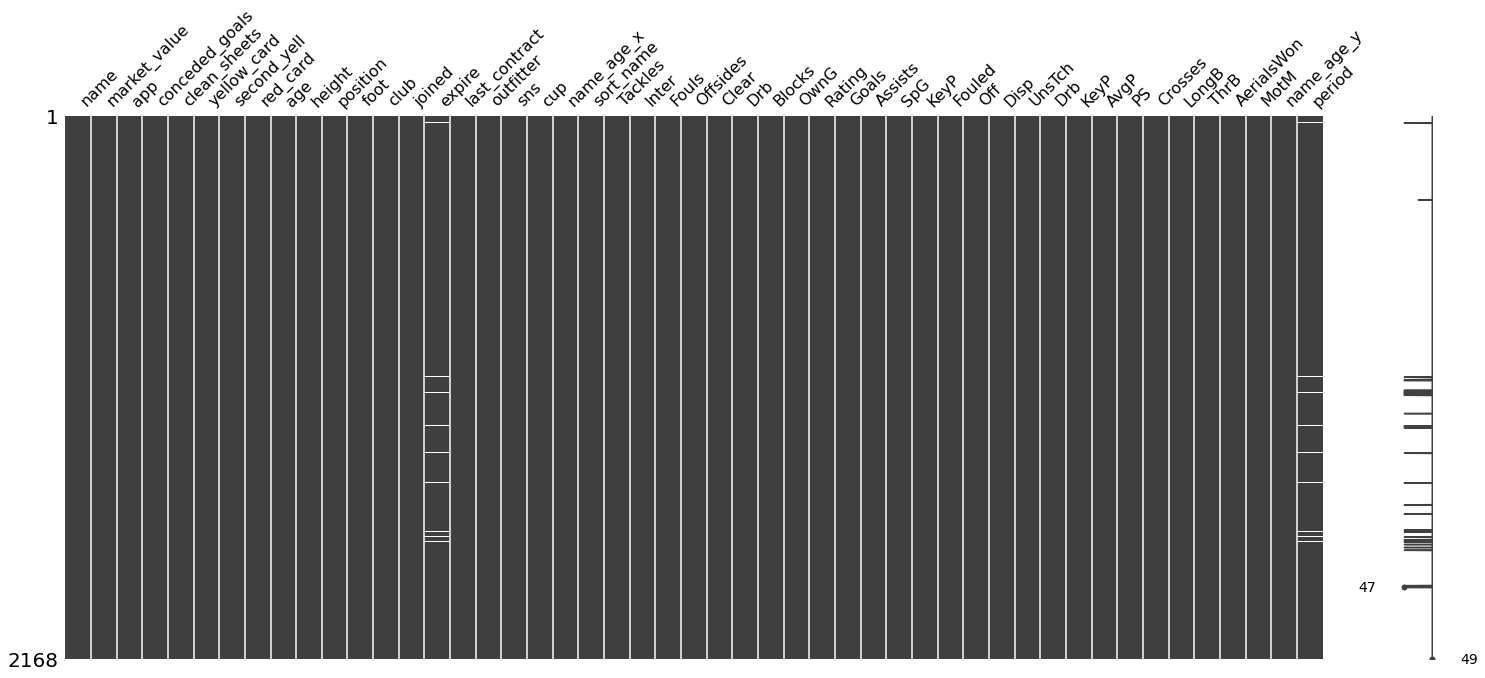

In [127]:
msno.matrix(total_df)

In [131]:
total_df['cluster'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'attack'], dtype=object)

In [141]:
total_df.replace(np.NaN, -1, inplace=True)

In [140]:
test[test['period'] == -1]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,joined,expire,last_contract,outfitter,sns,cup,name_age_x,sort_name,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,name_age_y,period,cluster
29,Rhys Williams,4500000,9,0.000000,0.000000,0.000000,0.000000,0.000000,20,195,Defender-Centre-Back,right,Liverpool FC,2020-07-01 00:00:00,-1,2020-09-01,Puma,1,0,RhysWilliams20,02ahiillmrsswy,0.7,0.7,0.4,0.4,2.9,0.0,0.3,0.0,6.71,0.000000,0.000000,0.8,0.2,0.2,0.0,0.0,0.0,0.0,0.2,56.0,87.3,0.0,2.1,0.1,3.3,0.0,RhysWilliams20,-1.0,Defender
1048,Alexander Schwolow,5400000,25,1.480000,0.320000,0.000000,0.000000,0.000000,28,190,Goalkeeper,right,Hertha BSC,2020-08-04 00:00:00,-1,2020-09-16,adidas,1,3,AlexanderSchwolow28,28aacdeehllnoorswwx,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,6.60,0.000000,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,30.3,77.3,0.0,6.8,0.0,0.2,2.0,AlexanderSchwolow28,-1.0,Goalkeeper
1058,Deyovaisio Zeefuik,3600000,22,0.045455,0.000000,0.090909,0.045455,0.000000,23,177,Defender-Right-Back,right,Hertha BSC,2020-08-06 00:00:00,-1,2017-09-29,Nike,1,3,DeyovaisioZeefuik23,23adeeefiiikoosuvyz,0.6,0.5,0.9,0.2,1.2,0.5,0.1,0.0,6.42,0.045455,0.000000,0.1,0.5,0.8,0.0,0.2,0.7,0.4,0.5,16.9,71.5,0.5,0.7,0.0,1.6,0.0,DeyovaisioZeefuik23,-1.0,Defender
1061,Eduard Löwen,3600000,6,0.000000,0.000000,0.000000,0.000000,0.000000,24,188,midfield-CentralMidfield,right,Hertha BSC,2019-07-01 00:00:00,-1,2020-09-29,adidas,2,0,EduardLöwen24,24addeelnruwö,0.7,0.1,0.1,0.0,0.1,0.4,0.0,0.0,6.08,0.000000,0.000000,0.1,0.0,0.0,0.0,0.4,0.3,0.0,0.0,8.6,80.0,0.1,0.4,0.0,0.0,0.0,EduardLöwen24,-1.0,midfield
1100,Mark Flekken,1800000,2,1.500000,0.000000,0.000000,0.000000,0.000000,27,194,Goalkeeper,both,SC Freiburg,2018-07-01 00:00:00,-1,2020-08-09,Puma,1,1,MarkFlekken27,27aeefkkklmnr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.92,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.7,72.6,0.0,11.3,0.0,0.0,0.0,MarkFlekken27,-1.0,Goalkeeper
1101,Philipp Lienhart,12600000,33,0.121212,0.000000,0.121212,0.000000,0.000000,24,189,Defender-Centre-Back,right,SC Freiburg,2018-07-01 00:00:00,-1,2021-05-12,Nike,1,3,PhilippLienhart24,24aehhiiillnppprt,0.6,1.2,0.5,0.4,2.7,0.3,0.6,0.0,6.58,0.121212,0.000000,0.3,0.1,1.0,0.1,0.1,0.3,0.1,0.1,57.0,85.0,0.0,4.2,0.0,1.7,0.0,PhilippLienhart24,-1.0,Defender
1105,Christian Günter,8100000,33,0.090909,0.090909,0.060606,0.000000,0.000000,28,185,Defender-Left-Back,left,SC Freiburg,2012-07-01 00:00:00,-1,2021-03-18,Nike,1,3,ChristianGünter28,28aceghiinnrrsttü,1.0,0.9,0.9,0.1,0.9,0.8,0.3,0.0,6.73,0.090909,0.090909,0.8,2.0,0.5,0.1,0.4,1.1,0.5,2.0,33.0,75.5,1.9,1.8,0.0,0.4,3.0,ChristianGünter28,-1.0,Defender
1106,Jonathan Schmid,3150000,30,0.066667,0.066667,0.133333,0.000000,0.000000,30,180,Defender-Right-Back,right,SC Freiburg,2019-07-01 00:00:00,-1,2021-03-18,Nike,1,1,JonathanSchmid30,03aacdhhijmnnost,1.2,0.9,0.5,0.0,1.0,0.5,0.3,0.0,6.65,0.066667,0.066667,0.7,0.8,0.5,0.0,0.4,0.9,0.6,0.8,30.5,77.1,0.6,2.1,0.0,0.5,0.0,JonathanSchmid30,-1.0,Defender
1108,Nicolas Höfler,2700000,30,0.033333,0.100000,0.366667,0.000000,0.000000,31,181,midfield-DefensiveMidfield,right,SC Freiburg,2010-07-01 00:00:00,-1,2020-01-28,Nike,1,3,NicolasHöfler31,13acefhillnorsö,1.7,2.1,2.3,0.0,1.1,1.2,0.3,0.0,6.91,0.033333,0.100000,0.6,0.5,1.1,0.0,0.5,0.9,1.1,0.5,44.5,84.5,0.1,2.3,0.0,2.0,1.0,NicolasHöfler31,-1.0,midfield
1111,Lino Tempelmann,810000,10,0.000000,0.000000,0.200000,0.000000,0.000000,22,174,midfield-CentralMidfield,right,SC Freiburg,2019-09-13 00:00:00,-1,2019-10-31,Puma,1,1,LinoTempelmann22,22aeeillmmnnnopt,0.5,0.2,0.4,0.0,0.6,0.4,0.1,0.0,6.12,0.000000,0.000000,0.4,0.1,0.7,0.0,0.3,0.0,0.1,0.1,14.0,80.7,0.0,0.8,0.0,0.6,0.0,LinoTempelmann22,-1.0,midfield


<AxesSubplot:>

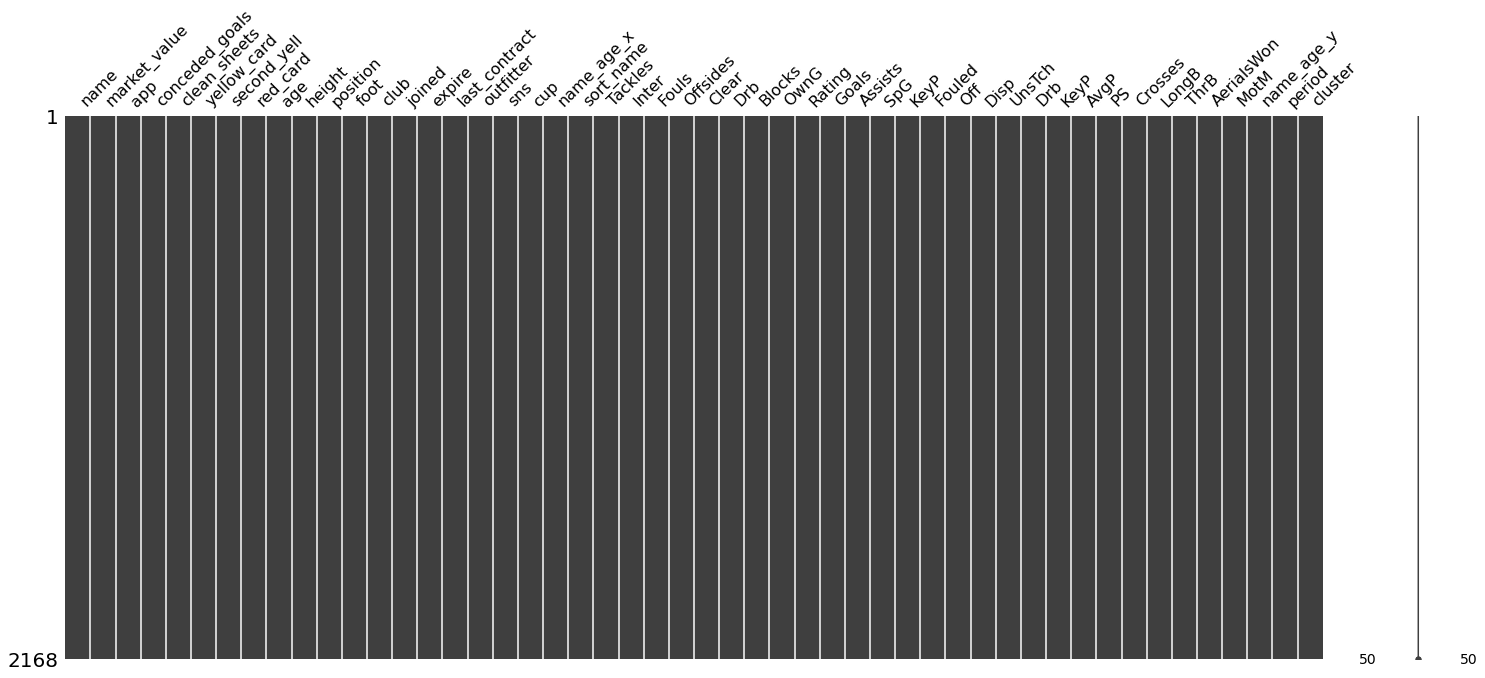

In [139]:
msno.matrix(test)

In [ ]:
total_df['period'] = 

In [130]:
total_df['cluster'] = total_df['position'].apply(lambda x: x.split("-")[0])

In [142]:
df1 = total_df[total_df['cluster'] == "Goalkeeper"]
df2 = total_df[total_df['cluster'] == "Defender"]
df3 = total_df[total_df['cluster'] == "midfield"]
df4 = total_df[total_df['cluster'] == "attack"]

In [143]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(177, 50)
(742, 50)
(643, 50)
(606, 50)


In [144]:
total_df.columns

Index(['name', 'market_value', 'app', 'conceded_goals', 'clean_sheets',
       'yellow_card', 'second_yell', 'red_card', 'age', 'height', 'position',
       'foot', 'club', 'joined', 'expire', 'last_contract', 'outfitter', 'sns',
       'cup', 'name_age_x', 'sort_name', 'Tackles', 'Inter', 'Fouls',
       'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Rating', 'Goals',
       'Assists', 'SpG', 'KeyP', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Drb',
       'KeyP', 'AvgP', 'PS', 'Crosses', 'LongB', 'ThrB', 'AerialsWon', 'MotM',
       'name_age_y', 'period', 'cluster'],
      dtype='object')

In [145]:
test = total_df.copy()

In [146]:
test.drop(columns=["name", "joined", "expire", "last_contract", "name_age_x", "sort_name",
                  "name_age_y"], inplace=True)

In [148]:
print(test.shape)
test.tail(2)

(2168, 43)


,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,outfitter,sns,cup,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,period,cluster
2174,900000,13,0.0,0.0,0.0,0.0,0.0,26,192,attack-Centre-Forward,right,Nîmes Olympique,Puma,1,1,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.0,0.0,0.6,0.2,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,4.0,attack
2175,315000,1,0.0,0.0,0.0,0.0,0.0,23,185,attack-Centre-Forward,right,Nîmes Olympique,Puma,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,50.0,0.0,0.0,0.0,1.0,0.0,5.2,attack


In [149]:
df1 = test[test['cluster'] == "Goalkeeper"]
df2 = test[test['cluster'] == "Defender"]
df3 = test[test['cluster'] == "midfield"]
df4 = test[test['cluster'] == "attack"]

In [150]:
with open('datas/goalkeeper.pkl', 'wb') as f:
    pickle.dump(df1, f)

with open('datas/defender.pkl', 'wb') as f:
    pickle.dump(df2, f)
    
with open('datas/midfield.pkl', 'wb') as f:
    pickle.dump(df3, f)
    
with open('datas/attack.pkl', 'wb') as f:
    pickle.dump(df4, f)